In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import folium
from folium.plugins import HeatMap

In [2]:
emd = gpd.read_file(r'C:\Users\2106-017\python\team_S\nlp\발달상권.geojson\발달상권.shp')
emd

STDR_YM_CD TRDAR_SE_C TRDAR_SE_1 TRDAR_NO           TRDAR_NM  XCNTS_VALU  \
0       202112          D       ????  2120234              ?????    210458.0   
1       202112          D       ????  2120175             ??????    201601.0   
2       202112          D       ????  2120137       ???(???????)    190840.0   
3       202112          D       ????  2120035              ???5?    200193.0   
4       202112          D       ????  2120073              ?????    202532.0   
..         ...        ...        ...      ...                ...         ...   
244     202112          D       ????  2120226              ?????    208550.0   
245     202112          D       ????  2120031             ???3??    199251.0   
246     202112          D       ????  2120038                ???    200940.0   
247     202112          D       ????  2120216  ???????(????????)    205001.0   
248     202112          D       ????  2120227                ???    208903.0   

     YDNTS_VALU SIGNGU_CD ADSTRD_CD  \
0      443967.0     11710  11710620   
1      442843.0     11650  11650510   
2      446506.0     11560  11560605   
3      451556.0     11140  11140590   
4      456473.0     11290  11290715   
..          ...       ...       ...   
244    444902.0     11710  11710610   
245    451877.0     11140  11140605   
246    450483.0     11140  11140625   
247    446821.0     11680  11680565   
248    446093.0     11710  11710710   

                                              geometry  
0    POLYGON ((210342.670 443526.890, 210252.720 44...  
1    POLYGON ((201752.480 442664.410, 201777.270 44...  
2    POLYGON ((190855.760 446471.460, 190919.770 44...  
3    POLYGON ((200323.330 451546.540, 200349.290 45...  
4    POLYGON ((202732.120 456405.350, 202746.300 45...  
..                                                 ...  
244  POLYGON ((208561.070 444549.440, 208509.860 44...  
245  POLYGON ((199471.560 451643.370, 199416.930 45...  
246  POLYGON ((200725.230 450254.800, 200688.850 45...  
247  POLYGON ((205057.550 446687.340, 204988.710 44...  
248  POLYGON ((208994.740 445743.570, 208997.980 44...  

[249 rows x 10 columns]

In [3]:
emd.iloc[0,:]

STDR_YM_CD                                               202112
TRDAR_SE_C                                                    D
TRDAR_SE_1                                                 ????
TRDAR_NO                                                2120234
TRDAR_NM                                                  ?????
XCNTS_VALU                                             210458.0
YDNTS_VALU                                             443967.0
SIGNGU_CD                                                 11710
ADSTRD_CD                                              11710620
geometry      POLYGON ((210342.67 443526.89, 210252.72 44349...
Name: 0, dtype: object

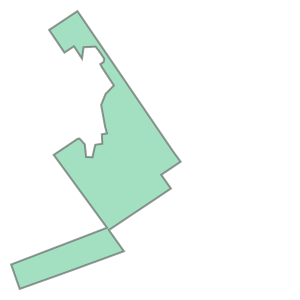

In [4]:
emd.iloc[0,-1]

In [5]:
f = pd.read_excel('instagram_location_f.xlsx')
f.drop('link', axis=1, inplace=True)

In [6]:
f

name   latitude   longitude
0           카페후암동  37.548741  126.977588
1        더 맛있는 밥집  37.518514  126.977598
2           국방컨벤션  37.533633  126.977599
3      모네,빛을그리다 전  37.536759  126.977613
4          인체의신비전  37.536924  126.977679
...           ...        ...         ...
4636       신사남도본가  37.518540  127.013199
4637     신시시장 쌍둥네  37.521310  127.013210
4638      잠원 한강공원  37.522153  127.013273
4639        휘닉스파크  37.519825  127.013295
4640  ALP Kitchen  37.538932  127.013327

[4641 rows x 3 columns]

In [18]:
m = folium.Map(
    location = (sum(f['latitude'])/len(f['latitude']), sum(f['longitude'])/len(f['longitude'])),
    tiles='OpenStreetMap',
    zoom_start=14)

folium.GeoJson(data=emd, style_function=lambda feature:{
    'fillColor':'#e41a1c',
    'color':'#e41a1c'
}).add_to(m)


for i in range(f.shape[0]):
    w = f.iat[i,1],f.iat[i,2]
    
    title = f.iloc[i,0]
    
    folium.Circle(w, tooltip=title, radius = 5, color = 'black').add_to(m)

In [19]:
m

In [20]:
m.save('hh.html')

In [9]:
f[f['name'] == '달리는 한남대교 위']

name   latitude   longitude
4518  달리는 한남대교 위  37.528782  127.010935

In [10]:
f[f['name'] == '가죽공방 집']

name   latitude  longitude
184  가죽공방 집  37.544594  126.98255

In [11]:
F = f[f['latitude']>=37.528782]
F = F[F['longitude']>= 126.98255]

In [12]:
F

name   latitude   longitude
184         가죽공방 집  37.544594  126.982550
185   해방촌 쏘피지니 작업실  37.544217  126.982581
186            한강로  37.531980  126.982666
187           달보드레  37.541221  126.982689
188            지하철  37.533265  126.982826
...            ...        ...         ...
4632       연남동 우리집  37.545728  127.013103
4633         옥수리버젠  37.543715  127.013115
4634          이스파이  37.540909  127.013129
4635     한남동 코끼리분식  37.531701  127.013144
4640   ALP Kitchen  37.538932  127.013327

[4192 rows x 3 columns]

In [13]:
m = folium.Map(
    location = (sum(F['latitude'])/len(F['latitude']), sum(F['longitude'])/len(F['longitude'])),
    tiles='OpenStreetMap',
    zoom_start=15)

folium.GeoJson(data=emd, style_function=lambda feature:{
    'fillColor':'#44a9db',
    'color':'#44a9db'
}).add_to(m)

heatmap = HeatMap(F.drop('name',axis=1), radius=8.2, blur=12, gradient={0.4:'white',0.65:'#e8430c',1:'red'})
m.add_child(heatmap)

m

In [14]:
# F.to_csv('위경도cut.csv', encoding='utf-8')

In [15]:
# m.save('instar_fin.html')

In [16]:
FF = gpd.read_file(r'C:\Users\2106-017\Downloads\mygeodata\instagram_location_f.geojson')
FF

link         name  \
0     https://www.instagram.com/explore/locations/44...        카페후암동   
1     https://www.instagram.com/explore/locations/28...     더 맛있는 밥집   
2     https://www.instagram.com/explore/locations/29...        국방컨벤션   
3     https://www.instagram.com/explore/locations/10...   모네,빛을그리다 전   
4     https://www.instagram.com/explore/locations/17...       인체의신비전   
...                                                 ...          ...   
4636  https://www.instagram.com/explore/locations/10...       신사남도본가   
4637  https://www.instagram.com/explore/locations/10...     신시시장 쌍둥네   
4638  https://www.instagram.com/explore/locations/18...      잠원 한강공원   
4639  https://www.instagram.com/explore/locations/58...        휘닉스파크   
4640  https://www.instagram.com/explore/locations/49...  ALP Kitchen   

       latitude   longitude                    geometry  
0     37.548741  126.977588  POINT (126.97759 37.54874)  
1     37.518514  126.977598  POINT (126.97760 37.51851)  
2     37.533633  126.977599  POINT (126.97760 37.53363)  
3     37.536759  126.977613  POINT (126.97761 37.53676)  
4     37.536924  126.977679  POINT (126.97768 37.53692)  
...         ...         ...                         ...  
4636  37.518540  127.013199  POINT (127.01320 37.51854)  
4637  37.521310  127.013210  POINT (127.01321 37.52131)  
4638  37.522153  127.013273  POINT (127.01327 37.52215)  
4639  37.519825  127.013295  POINT (127.01330 37.51983)  
4640  37.538932  127.013327  POINT (127.01333 37.53893)  

[4641 rows x 5 columns]

In [17]:
FF['geometry'].apply(lambda  x: re.sub('POINT','',x))

TypeError: expected string or bytes-like object

In [30]:
# FF.drop(['link','name','latitude','longitude'], axis=1, inplace=True)
FF.drop(['latitude','longitude'], axis=1, inplace=True)

In [32]:
m1 = folium.Map(
    location = (sum(F['latitude'])/len(F['latitude']), sum(F['longitude'])/len(F['longitude'])),
    tiles='OpenStreetMap',
    zoom_start=15)

folium.GeoJson(data=emd, style_function=lambda feature:{
    'fillColor':'#44a9db',
    'color':'#44a9db'
}).add_to(m1)

# folium.GeoJson(data = FF).add_to(m1)

m1